In [2]:
#%% Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
import numpy as np
import statsmodels.api as sm
import random
import utils as ut
from datasets import load_dataset
import time

/home/tomi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the TIMIT dataset from a specific directory


In [3]:
TIMIT = load_dataset('timit_asr', data_dir='/home/tomi/Documents/tesis_speechRate/timit')
TIMIT_train = TIMIT['train']
TIMIT_test = TIMIT['test']

/home/tomi/.local/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for timit_asr contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/timit_asr
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


## Global variables


In [4]:
SR = 16000
SAMPLE = TIMIT_train[0]

## Check a single sample

In [5]:

# Access the audio data and sample rate
audio_data = SAMPLE['audio']['array']
sample_rate = SAMPLE['audio']['sampling_rate']

# Play the audio
ipd.Audio(audio_data, rate=sample_rate)

In [6]:
# Print the phones
phones = SAMPLE['phonetic_detail']
print(phones)

{'start': [0, 3050, 4559, 5723, 6642, 8772, 9190, 10337, 11517, 12500, 12640, 14714, 15870, 16334, 18088, 20417, 21199, 22560, 22920, 23271, 24229, 25566, 27156, 28064, 29660, 31719, 33360, 33754, 34715, 36080, 36326, 37556, 39561, 40313, 42059, 43479, 44586], 'stop': [3050, 4559, 5723, 6642, 8772, 9190, 10337, 11517, 12500, 12640, 14714, 15870, 16334, 18088, 20417, 21199, 22560, 22920, 23271, 24229, 25566, 27156, 28064, 29660, 31719, 33360, 33754, 34715, 36080, 36326, 37556, 39561, 40313, 42059, 43479, 44586, 46720], 'utterance': ['h#', 'sh', 'ix', 'hv', 'eh', 'dcl', 'jh', 'ih', 'dcl', 'd', 'ah', 'kcl', 'k', 's', 'ux', 'q', 'en', 'gcl', 'g', 'r', 'ix', 's', 'ix', 'w', 'ao', 'sh', 'epi', 'w', 'ao', 'dx', 'axr', 'ao', 'l', 'y', 'ih', 'axr', 'h#']}


## Check if all the sampling rates are measured at 16000 Hz


In [7]:
#%%

ALL_EQUAL_SAMPLING_RATE = True
DIFFERENTS_SAMP_RATE = []
for i in range(TIMIT_train.num_rows):
    sample = TIMIT_train[i]
    is_equal = sample['audio']['sampling_rate'] == SR
    if not is_equal:
        DIFFERENTS_SAMP_RATE.append(sample['audio']['sampling_rate'])
        ALL_EQUAL_SAMPLING_RATE = False

if(ALL_EQUAL_SAMPLING_RATE): 
    show = 'All the samples has the same sampling rate (16000 per second)'
else:
    show = 'There are different sampling rates in the dataset'
print(show)

All the samples has the same sampling rate (16000 per second)


## Show words duration

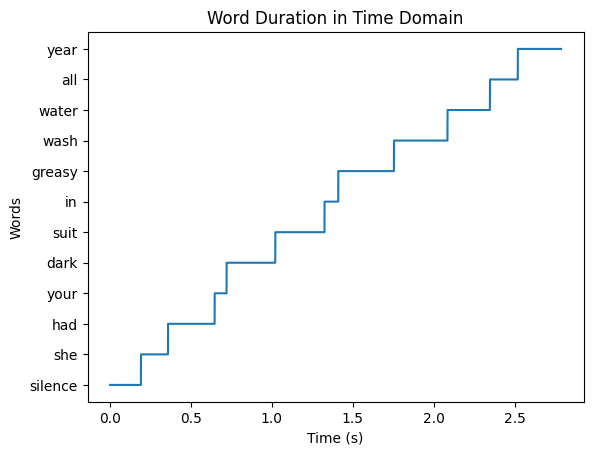

In [8]:
#%% 

ut.show_words_duration(sample=SAMPLE, SR=SR)

## SPEED BY phone

[  5.24590164  10.60304838  13.74570447  17.41022851   7.51173709
  38.27751196  13.9494333   13.55932203  16.27670397 114.28571429
   7.71456123  13.84083045  34.48275862   9.12200684   6.86990125
  20.46035806  11.75606172  44.44444444  45.58404558  16.70146138
  11.9670905   10.06289308  17.62114537  10.02506266   7.77076251
   9.75015235  40.60913706  16.64932362  11.72161172  65.04065041
  13.00813008   7.98004988  21.27659574   9.16380298  11.26760563
  14.45347787   7.49765698]


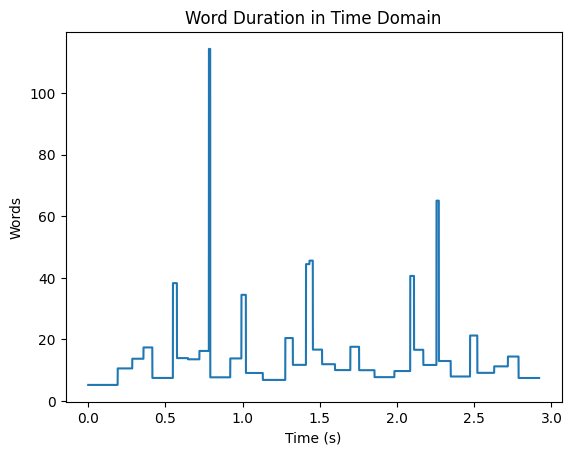

In [10]:
#%% 
X, y = ut.speed_by_phone(sample=SAMPLE)

## SPEED REGRESSION

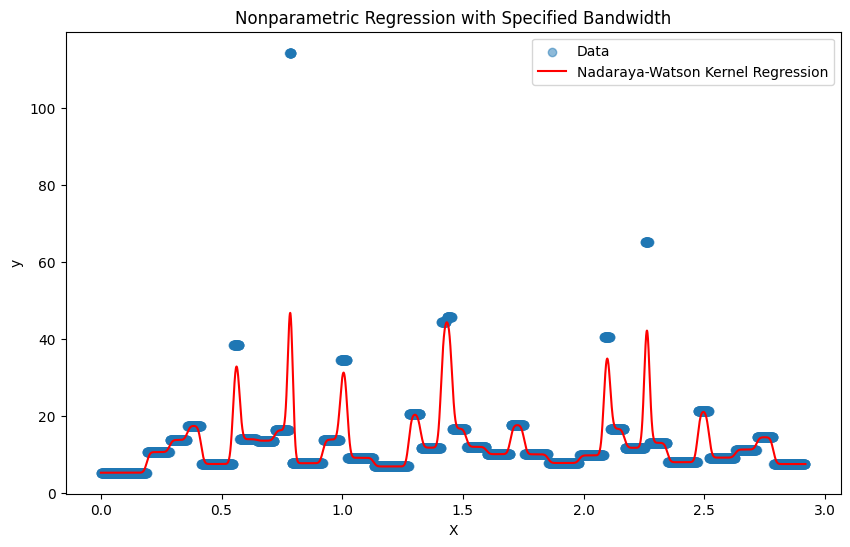

In [12]:
#%% 

ut.speed_smoothed_regression(X=X, y=y, bandwidth=0.01)

## Create the dataframe with the information of each record

In [13]:
#%% 

t0 = time.time()
TIMIT_df = ut.TIMIT_df_by_record()   
TIMIT_df.build_phone_test(TIMIT_test)
TIMIT_df.build_phone_train(TIMIT_train)
TIMIT_df.build_word_test(TIMIT_test)
TIMIT_df.build_word_train(TIMIT_train)
t1 = time.time()
print('Time: ', t1-t0)

Time:  26.72958278656006


In [14]:
#%% Print the first 5 rows of the test set

TIMIT_df.phone_test.head()

,start,stop,utterance,duration_s,phone_rate,sample_id
0,0,9640,h#,0.602500,0.000000,DR1_AKS0_SA1
1,9640,11240,sh,0.100000,10.000000,DR1_AKS0_SA1
2,11240,12783,iy,0.096437,10.369410,DR1_AKS0_SA1
3,12783,14078,hv,0.080937,12.355212,DR1_AKS0_SA1
4,14078,16157,ae,0.129938,7.696008,DR1_AKS0_SA1


In [15]:
# %% Print the first 5 rows of the silence records

TIMIT_df.phone_test[TIMIT_df.phone_test['phone_rate'] == 0]

,start,stop,utterance,duration_s,phone_rate,sample_id
0,0,9640,h#,0.602500,0.0,DR1_AKS0_SA1
29,45119,45624,epi,0.031563,0.0,DR1_AKS0_SA1
40,60600,63440,h#,0.177500,0.0,DR1_AKS0_SA1
0,0,13227,h#,0.826688,0.0,DR1_AKS0_SA2
6,19990,21200,epi,0.075625,0.0,DR1_AKS0_SA2
...,...,...,...,...,...,...
32,34214,36240,h#,0.126625,0.0,DR8_SLB0_SX23
0,0,2040,h#,0.127500,0.0,DR8_SLB0_SX293
45,43989,46560,h#,0.160688,0.0,DR8_SLB0_SX293
0,0,1960,h#,0.122500,0.0,DR8_SLB0_SX383


In [16]:
# %% Examples with groupby

TIMIT_df.phone_test.groupby("sample_id")["duration_s"].sum()

sample_id
DR1_AKS0_SA1       3.965
DR1_AKS0_SA2       3.625
DR1_AKS0_SI1573    4.970
DR1_AKS0_SI2203    3.510
DR1_AKS0_SI943     3.750
                   ...  
DR8_SLB0_SX113     2.195
DR8_SLB0_SX203     2.210
DR8_SLB0_SX23      2.265
DR8_SLB0_SX293     2.910
DR8_SLB0_SX383     2.545
Name: duration_s, Length: 1680, dtype: float64

In [17]:
# %% Make a DF with the information of the samples

df_bySample_train = ut.TIMIT_df_by_sample(TIMIT_df.phone_train)

In [18]:
# %% Print the first 5 rows of the samples

df_bySample_train.head()

,duration_wpau,mean_speed
sample_id,,
DR1_CJF0_SA1,2.596000,18.766329
DR1_CJF0_SA2,1.929188,21.136789
DR1_CJF0_SI1027,2.816750,18.632070
DR1_CJF0_SI1657,2.585000,21.683541
DR1_CJF0_SI648,3.397187,19.688673


In [19]:
#%% Show the distribution of the duration of the samples

sample1 = TIMIT_df.phone_train[TIMIT_df.phone_train['sample_id'] == 'DR1_CJF0_SA1']

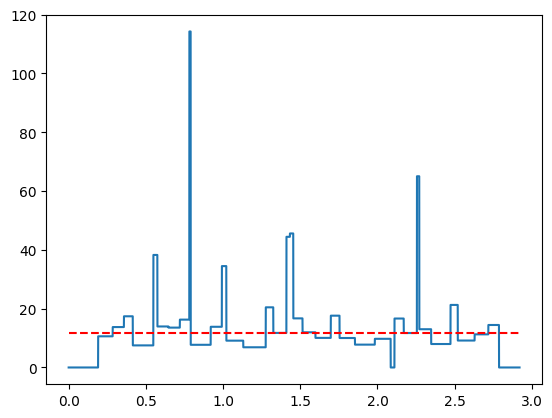

In [20]:
#%% This block try to do a plot of the phone rate of the sample.

size = sample1['stop'][len(sample1)-1]
time1 = np.zeros(size)
phone_rate_axis = np.zeros(size)

## Cambiar el for para que itere en los fonos y no en el sampling rate.
###  arange(0, size)
###  for i in phones ....

j=0
for i in range(size):
    border = sample1['stop'][j]
    if i >= border:
        j+=1
    
    time1[i] = i/SR
    phone_rate_axis[i] = sample1['phone_rate'][j]

mean_phone_rate = np.mean(phone_rate_axis)

plt.plot(time1, phone_rate_axis)
plt.hlines(mean_phone_rate, 0, time1[-1], colors='r', linestyles='dashed')

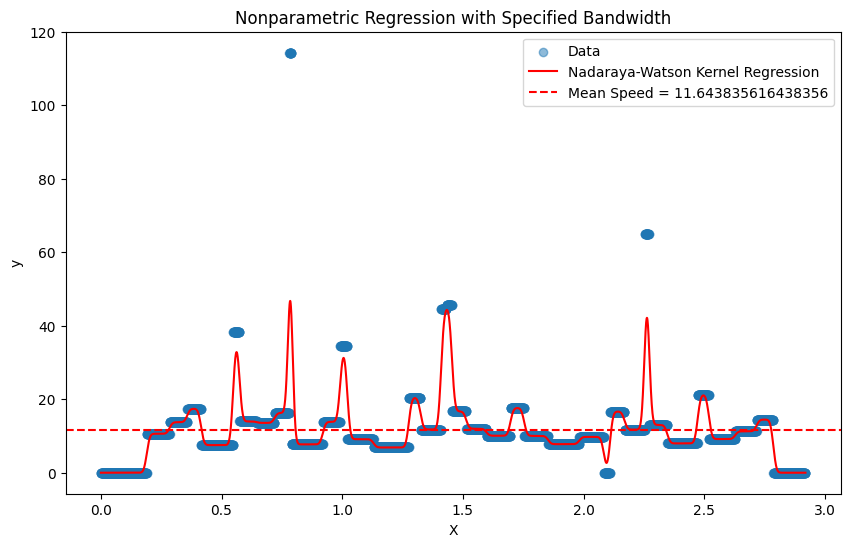

In [21]:
# %% Instantaneous speed vs mean speed

ut.speed_smoothed_regression(X=time1, y=phone_rate_axis, bandwidth=0.01, mean_speed=mean_phone_rate)